
# Clustering: Application to Fashion MNIST

In this example, we will use two clustering techniques to explore a unknown dataset: Fashion MNIST. 

The idea is to consider the Fashion MNIST dataset and to classify its content in an unsupervised manner. The resulting clusters are then compared to the 10 known classes of datatset. 


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

df = pd.read_csv("...../fashion-mnist_test/fashion-mnist_test.csv")
X = df.iloc[:, 1:] # The Original matrix. Each row is an 28x28 gray-level image.
y = df.iloc[:, :1] # The class of the image.

## A quick look to the dataset

The full description of this datset is available following the URL:
https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/


The number of images = 10000
The number of classes = 10


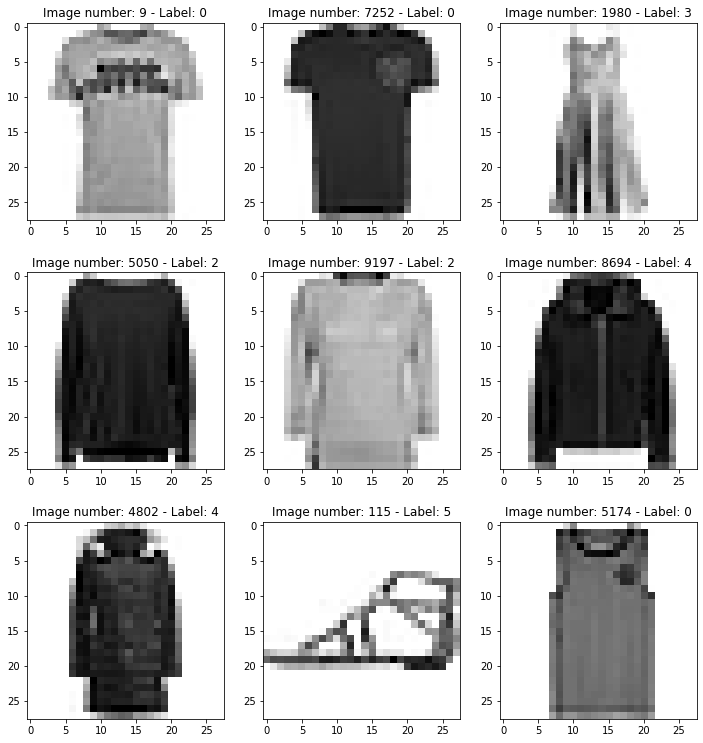

In [23]:
from matplotlib import pyplot as plt

Xn = X.values 
yn = y.values 

number_images = Xn.shape[0]
number_classes = np.unique(yn).size # Other solution : yn.max()+1

print('The number of images = {}'.format(number_images))
print('The number of classes = {}'.format(number_classes))

j = 1
fig = plt.figure()
fig.set_figheight(13)
fig.set_figwidth(12)
for i in range(9):
    cur = np.random.randint(number_images)
    fig.add_subplot(3,3,j)
    plt.imshow(Xn[cur].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title('Image number: {} - Label: {}'.format(cur, yn[cur,0]))
    #plt.colorbar()                                         
    j=j+1

plt.show()




## Preprocessing the dataset using PCA 

Now that we know very well PCA and it's ability to reduce the dimension of the data while preserving most of the information, we first pre-process the dataset so that we get rid of useless dimensions.

Work to do :
- Apply PCA on data stored in X and keep 90% of expressed variance.
- Transform the data X using the computed PCA and store the result in X_r.
- Print the original dimension of the dataset.
- Print the dimension of the dataset after PCA.

The result of applying PCA on Fashion MNIST : Each principal component is a apotentially interpretable picture of what each vector is finding.


Work to do :
- For each of the 4 first components (pca.components_), print the corresponding explained variance ratio (pca.explained_variance_ratio_). 
- Comment the pictures.

Original dimension of the dataset (before PCA)  = (10000, 784)
Number of dimensions after PCA (0.90) =(82, 784)


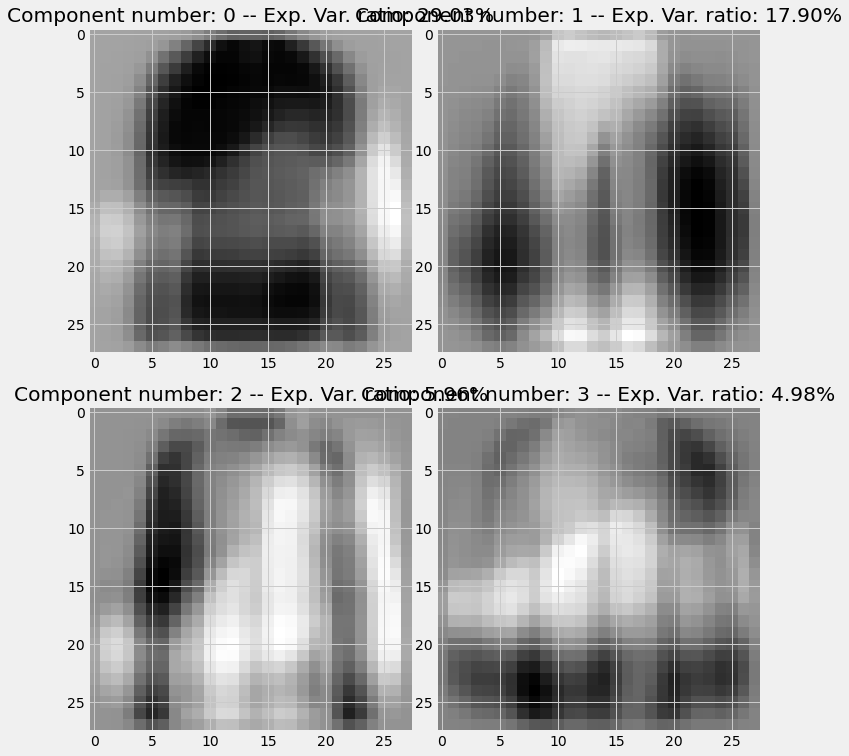

In [74]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
Xn_r = pca.fit(Xn).transform(Xn)
print('Original dimension of the dataset (before PCA)  = {}'.format(Xn.shape))
print('Number of dimensions after PCA (0.90) ={}'.format(pca.components_.shape))
      
fig=plt.figure()
fig.set_figheight(21)
fig.set_figwidth(10)
for i in range(4):
    ax = pca.components_[i, :].reshape(28, 28)
    fig.add_subplot(4,2,i+1)
    plt.imshow(ax, cmap='gray_r')
    plt.title("Component number: {0:} -- Exp. Var. ratio: {1:.2f}%".format(i, pca.explained_variance_ratio_[i]*100))   
fig.tight_layout()    

    
plt.show()


# Comments

## K-Means

Let's first apply k-means on the PCA transformed vectors of the dataset.
The target number of k-means centroids = 1000.

Print the number of obtained clusters and store this value in **nb_clusts**.

Use for that: The package **sklearn.cluster** (from sklearn.cluster import KMeans)
Documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [51]:
target_nb_clusts = 1000

# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(Xn_r)
#     sse.append(kmeans.inertia_)

# plt.style.use("fivethirtyeight")
# plt.plot(range(1, 11), sse)
# plt.xticks(range(1, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()

# kl = KneeLocator(
#         range(1, 11), sse, curve="convex", direction="decreasing"
#     )

# kl.elbow


# nb_clusts = kl.elbow

# print("The numbers of k-means resulting clusters is ", nb_clusts)

k_means = KMeans(n_clusters=target_nb_clusts, random_state=0)

k_means.fit(Xn_r)
nb_clusts = k_means.n_clusters 
print("The numbers of k-means resulting clusters is ", nb_clusts)

The numbers of k-means resulting clusters is  1000


### Before going further, let's study the properties of our clusters

The first thing to do is to create **nb_clusts** lists named **cluster_index**, where:
- **cluster_index[i]** contains the indices from **X** of vectors that belong to cluster # **i**.

In [73]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]

for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)


In order to assess the quality of produced clusters, here we will plot images that belong to a cluster (**clust**). 

You have to run the following cell several times with different values of **clust**.

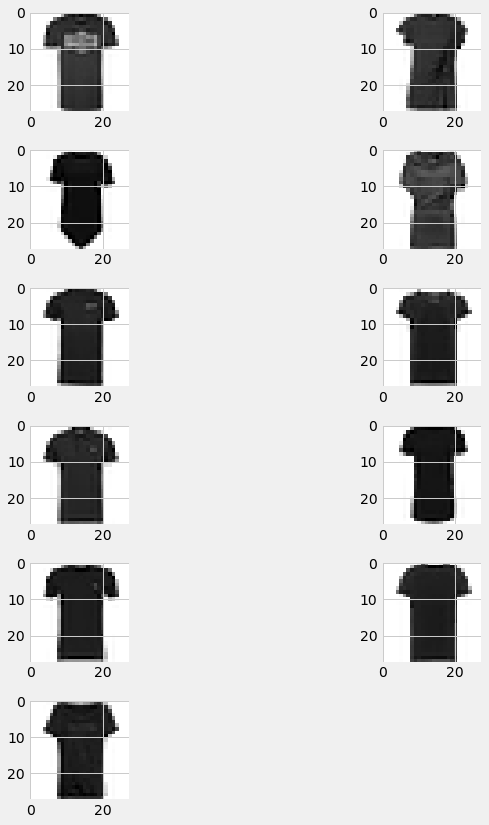

In [100]:



# plt.show()
fig = plt.figure(figsize=(20,20));
fig.set_figheight(21)
fig.set_figwidth(10)
clust = np.random.randint(1000) # ID of cluster to visualize
clusterL = []
clusterI = cluster_index[clust]
for i in range(0,len(clusterI)):
    ax = Xn[cluster_index[clust][i]].reshape(28,28)
    fig.add_subplot(len(clusterI),2,i+1)
    plt.imshow(ax, cmap='gray_r')
    clusterL.append(int(yn[cluster_index[clust][i]]))
fig.tight_layout()

# fig = plt.figure(figsize=(20,20));
# clust = np.random.randint(1000) # ID of cluster to visualize
# clusterL = []
# clusterI = cluster_index[clust]
# print("Cluster ID N° {}".format(clust))
# for i in range(0,len(clusterI)):
#     plt.subplot(10, 10, i+1); 
#     plt.imshow(Xn[cluster_index[clust][i]].reshape(28,28), cmap=plt.cm.binary)
#     clusterL.append(int(yn[cluster_index[clust][i]]))
plt.show()

We can even plot the histogram of the class labels of vectors contained in the cluster.

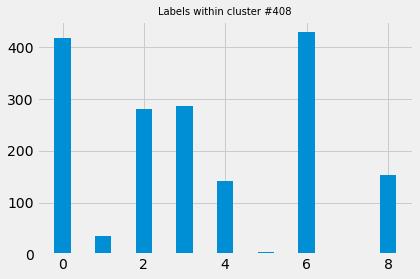

In [135]:
# In the previous cell, you should have created and filled an array "clusterL" with the 
# labels of images that belong to the cluster "clust" 

plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()


# Hierarchical clustering

Clusters from k-means seems to be of good quality, that is vectors within each cluster are mostly from the same class (i.e. they represent the same object), if we consider the groud-truth (true classes) of images in the dataset.

However, 1000 clusters is too much, especially if we know that the dataset is actually composed of images from only 10 classes.

One way to group k-means clusters in order to have clusters that are as close as possible to the classes of our dataset is to use hierarchical clustering.

One can say, we could have used hierarchical clustering from the begining. The answer to this question is related to the complexity of the hierarchical clustering algorithm.

The proposed approach here is to apply hierarchical clustering over the k-means centroids.

Let's start...

- Apply the hieararchical clustering over k-means centroids (the ward criteria has to be used).
- Plot the resulting dendrogram.


You can use "dendrogram", "linkage", "fcluster" from "scipy.cluster.hierarchy".
Needed functions: "linkage" and "dendrogram".

Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

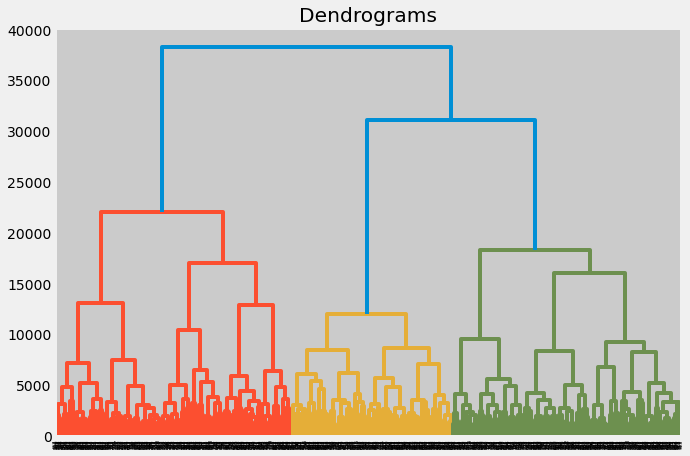

In [81]:
import scipy.cluster.hierarchy as shc

centroids_after_kmeans = k_means.cluster_centers_


plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
Z=shc.linkage(k_means.cluster_centers_, method='ward')
dend = shc.dendrogram(Z)
plt.show()


From the dendrogram:
- Select 10 clusters.
- Store the obtained clusters in **final_clusters**
- Create an array of lists named **clustLL**, where:
    - **clustLL[i]** contains the indices from **X** of vectors that belong to cluster # **i**.
    
## TO DO

Extract "final_clusters" using function "fcluster".

In [84]:
from scipy.cluster.hierarchy import fcluster

final_clusters =  fcluster(Z, t=10, criterion="maxclust")

clustLL=[[] for j in range(10)]

for j in range(10):
    for i in range(final_clusters.shape[0]):
        if (final_clusters[i]-1==j):
            clustLL[j].extend(cluster_index[i])
        

In [85]:
# few verifications...

for j in range(10):
    print(len(clustLL[j]))

s=0
for j in range(10):
    s=s+len(clustLL[j])
    
print(s)

475
1658
888
355
425
771
1221
1065
1393
1749
10000


Now that we have identified the final clusters, we can chack their coherence with respect to the 10 classes of our dataset.

We can do that by ploting the labels of vectors in each of the 10 final clusters.

Let's start with cluster # 6....

Perform this verification for all of the clusters.

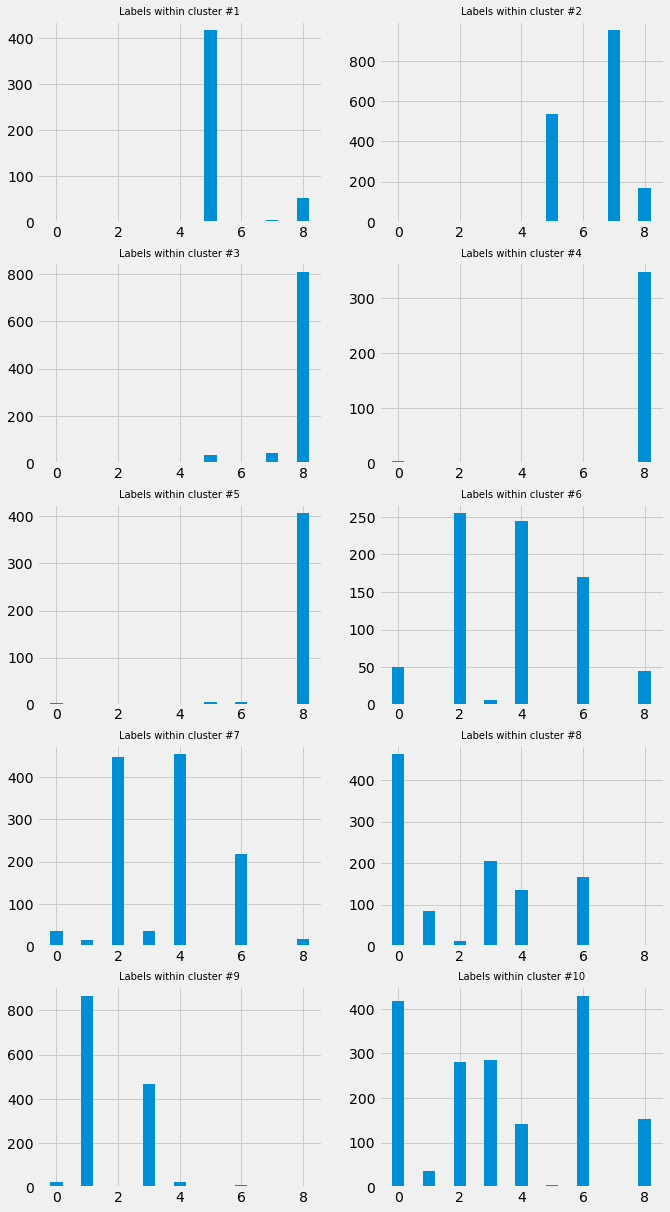

In [134]:
num_clust = 0
j=0

fig = plt.figure();
fig.set_figheight(20)
fig.set_figwidth(10)
for i in range(10):
    clusterL= []
    
    fig.add_subplot(5 ,2 ,j+1)
    for i in clustLL[num_clust]: 
        clusterL.append(yn[i,0])
    
    
    plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

    plt.title('Labels within cluster #{}'.format(num_clust+1), fontsize=10)
    num_clust=num_clust+1
    j=j+1
plt.show()



## Report

-We can say that with the KMeans algorithm we were able to classify the images using 1000 clusters but the precision increase with the Hierarchical clustering due to the fact that we focus only on 10 cluster.
-Either while using the KMeans algorithm or the Hierarchical clustering and ploting the labels within cluster diagram , we don't have the class number nine .